EDA - 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df1 = pd.read_csv('BIKE DETAILS.csv')

In [11]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [59]:
#Q1:What is the range of selling prices in the dataset?
selling_price_range = df1["selling_price"].max() - df1["selling_price"].min()

print("Range of selling prices:", selling_price_range)


Range of selling prices: 755000


In [60]:
#Q2:What is the median selling price for bikes in the dataset?

median_price = df1["selling_price"].median()


print("Median selling price:", median_price)


Median selling price: 45000.0


In [61]:
#Q3:What is the most common seller type?
most_common_seller_type = df1["seller_type"].mode()[0]

print("Most common seller type:", most_common_seller_type)


Most common seller type: Individual


In [62]:
#Q4: How many bikes have driven more than 50,000 kilometers?
count_over_50000 = df1[df1["km_driven"] > 50000].shape[0]

print("Number of bikes driven more than 50,000 km:", count_over_50000)


Number of bikes driven more than 50,000 km: 170


In [63]:
#Q5:What is the average km_driven value for each ownership type?
average_km_by_owner = df1.groupby("owner")["km_driven"].mean()

print("Average km_driven by ownership type:")
print(average_km_by_owner)


Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [64]:
#Q6:What proportion of bikes are from the year 2015 or older?
proportion_2015_or_older = (df1["year"] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", proportion_2015_or_older)


Proportion of bikes from 2015 or older: 0.5664467483506126


In [65]:
#Q7:What is the trend of missing values across the dataset?
missing_values = df1.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [67]:
#Q8:What is the highest ex_showroom_price recorded, and for which bike?
highest_price_row = df1.loc[df1["ex_showroom_price"].idxmax()]
print("Bike with highest ex_showroom_price:")
print("Name:", highest_price_row["name"])
print("Price:", highest_price_row["ex_showroom_price"])


Bike with highest ex_showroom_price:
Name: Harley-Davidson Street Bob
Price: 1278000.0


In [68]:
#Q9:What is the total number of bikes listed by each seller type?
bikes_by_seller_type = df1["seller_type"].value_counts()
print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


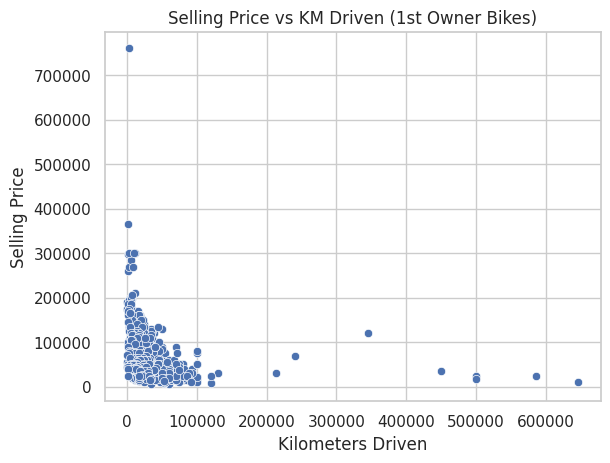

In [69]:
#Q10:What is the relationship between selling_price and km_driven for first-owner bike?
first_owner_bikes = df1[df1["owner"] == "1st owner"]

sns.scatterplot(data=first_owner_bikes, x="km_driven", y="selling_price")
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()


In [70]:
#Q11:Identify and remove outliers in the km_driven column using the IQR method
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df1[(df1["km_driven"] >= lower_bound) & (df1["km_driven"] <= upper_bound)]

print("Number of records after removing outliers:", df_no_outliers.shape[0])




Number of records after removing outliers: 1022


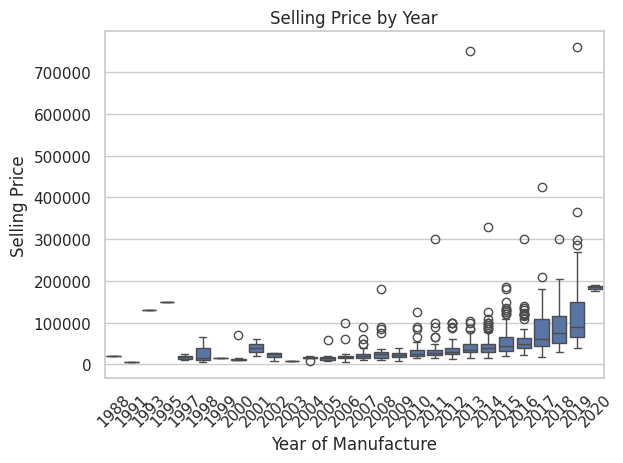

In [71]:
#Q12:Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.boxplot(data=df1, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.title("Selling Price by Year")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.tight_layout()
plt.show()


In [72]:
#Q13:What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
import pandas as pd
from datetime import datetime

current_year = datetime.now().year
df1["bike_age"] = current_year - df1["year"]

avg_price_by_age = df1.groupby("bike_age")["selling_price"].mean().reset_index()

avg_price_by_age["depreciation"] = avg_price_by_age["selling_price"].max() - avg_price_by_age["selling_price"]

print("Average depreciation in selling price by bike age:")
print(avg_price_by_age)



Average depreciation in selling price by bike age:
    bike_age  selling_price   depreciation
0          5  183333.333333       0.000000
1          6  119689.511628   63643.821705
2          7   87660.374046   95672.959288
3          8   78894.736842  104438.596491
4          9   58469.018692  124864.314642
5         10   56500.000000  126833.333333
6         11   48668.131868  134665.201465
7         12   51136.986301  132196.347032
8         13   35748.400000  147584.933333
9         14   35655.721311  147677.612022
10        15   31793.333333  151540.000000
11        16   22267.857143  161065.476190
12        17   34289.285714  149044.047619
13        18   24927.586207  158405.747126
14        19   23380.000000  159953.333333
15        20   16978.571429  166354.761905
16        21   15100.000000  168233.333333
17        22    8000.000000  175333.333333
18        23   20666.666667  162666.666667
19        24   40000.000000  143333.333333
20        25   20833.333333  162500.000000
21 

In [76]:
#Q14:Which bike names are priced significantly above the average price for their manufacturing year?
year_avg_price = df1.groupby("year")["selling_price"].mean().reset_index()
year_avg_price.columns = ["year", "avg_price"]

df = df1.merge(year_avg_price, on="year")

df1["above_avg_flag"] = df["selling_price"] > 1.5 * df["avg_price"]

above_avg_bikes = df[df["above_avg_flag"]][["name", "year", "selling_price", "avg_price"]]

print("Bikes priced significantly above the average for their manufacturing year:")
print(above_avg_bikes)


Bikes priced significantly above the average for their manufacturing year:
                                     name  year  selling_price      avg_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                          Yamaha YZF R3  2019         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
23                          Jawa Standard  2019         180000  119689.511628
..                                    ...   ...            ...            ...
979             Royal Enfield Thunder 500  2015         105000   56500.000000
981             Royal Enfield Thunder 350  2013         105000   51136.986301
983             Royal Enfield Classic 350  2015         100000   56500.000000
984             Royal Enfield Classic 500  2014          95000   48668.131868
985             Royal Enfield Classic 500  2011          90000   35

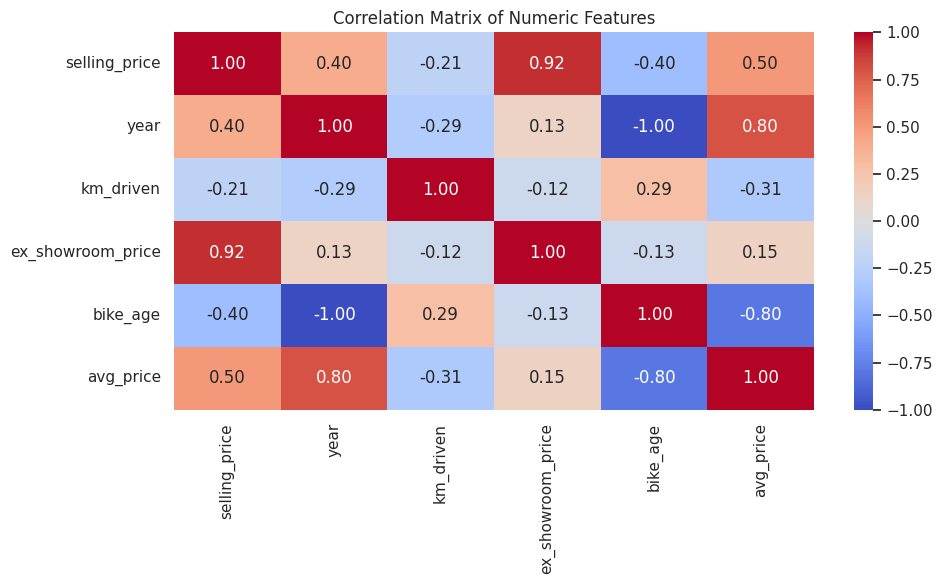

In [77]:
#Q15:Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


EDA-2

In [82]:
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


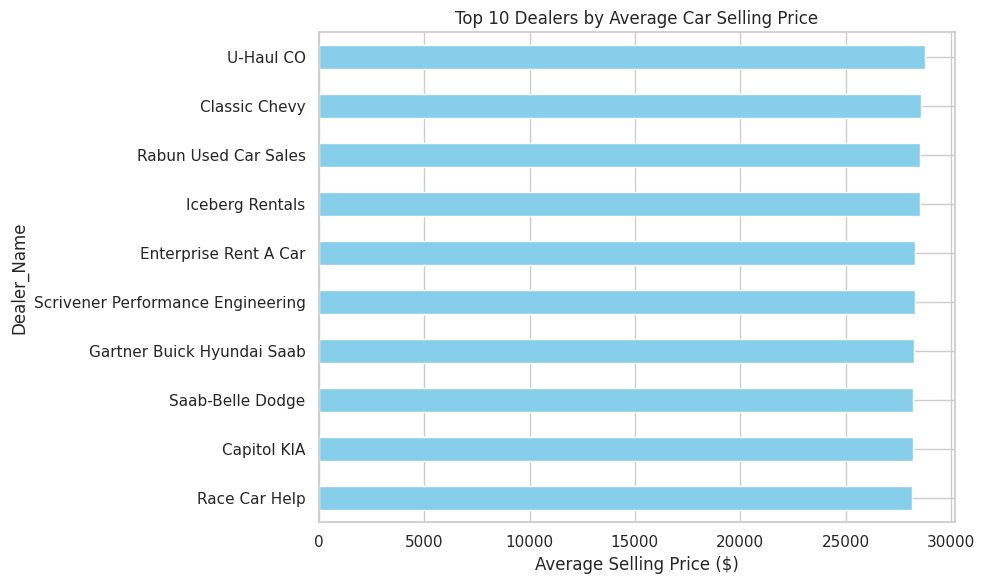

In [83]:
#Q1:What is the average selling price of cars for each dealer, and how does it compare across different dealers.
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)

avg_price_per_dealer.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Average Selling Price ($)")
plt.title("Top 10 Dealers by Average Car Selling Price")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [84]:
#Q2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends.
price_variation_by_company = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)

highest_variation_company = price_variation_by_company.idxmax()
highest_variation_value = price_variation_by_company.max()

print("Company with highest price variation:", highest_variation_company)
print("Standard deviation in price:", highest_variation_value)


Company with highest price variation: Lincoln
Standard deviation in price: 19658.050211265567


<ipython-input-85-5a00d71afba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="Set2")


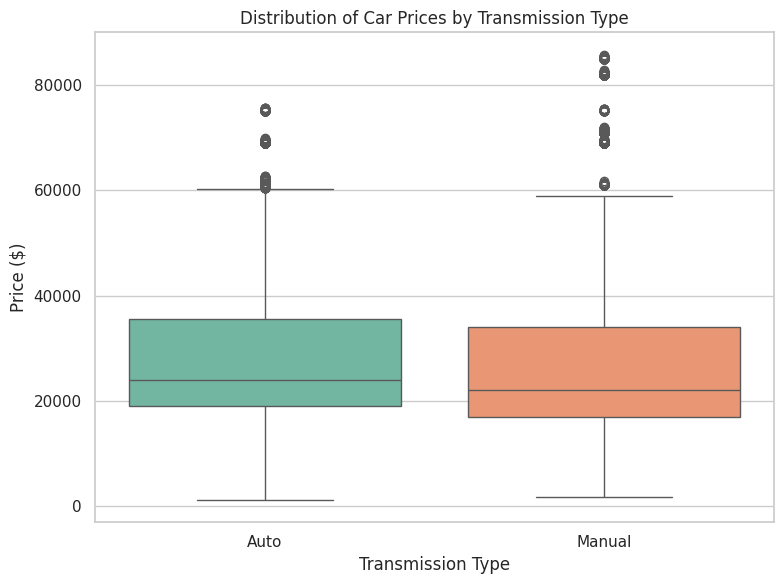

Interquartile Range (IQR) by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [85]:
#Q3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

iqr_by_transmission = df.groupby("Transmission")["Price ($)"].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile Range (IQR) by Transmission Type:")
print(iqr_by_transmission)


<ipython-input-86-c100f7cb43b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="Set3")


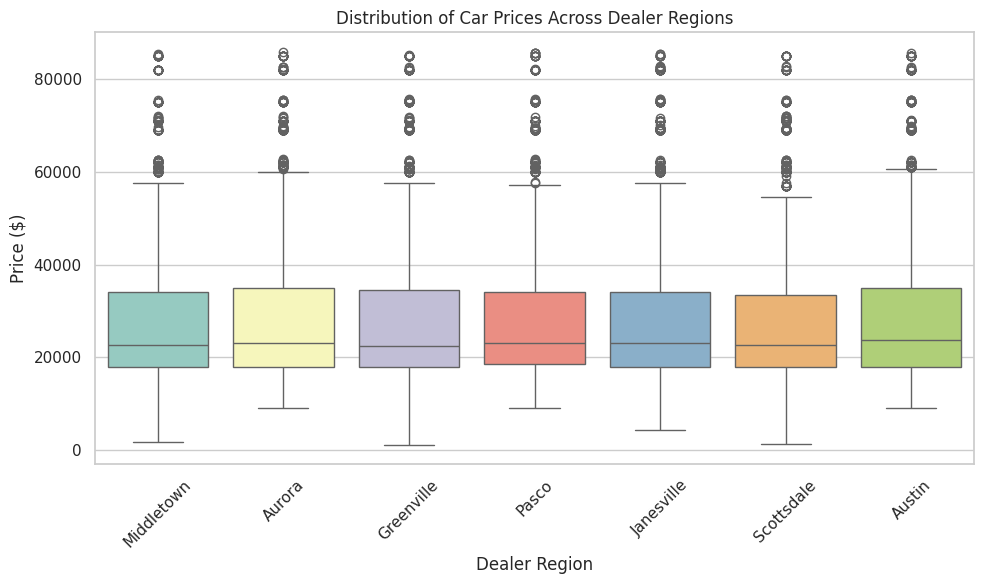

In [86]:
#Q4:What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="Set3")
plt.title("Distribution of Car Prices Across Dealer Regions")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-87-2417b82a4593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Body Style", order=df["Body Style"].value_counts().index, palette="pastel")


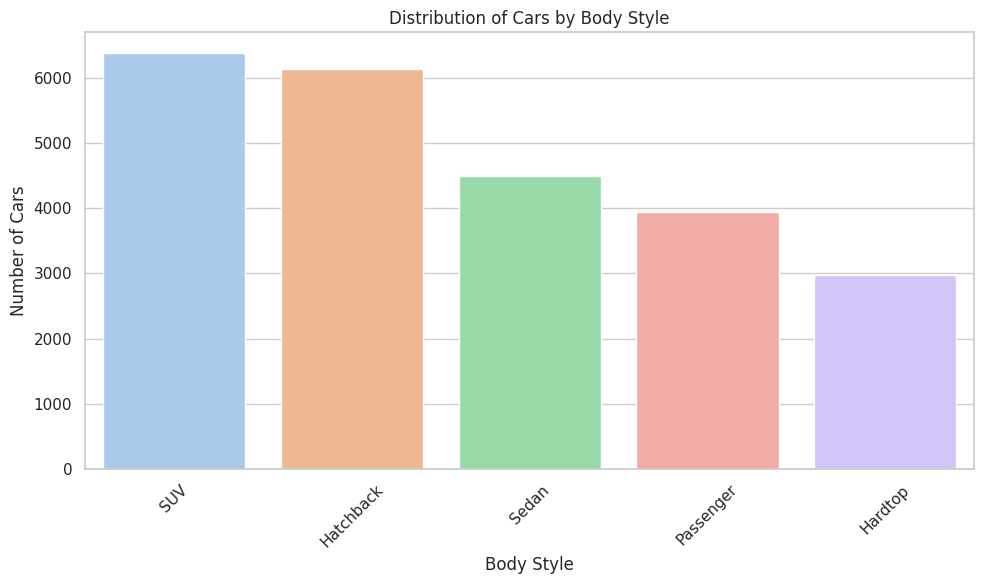

In [87]:
#Q5:What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Body Style", order=df["Body Style"].value_counts().index, palette="pastel")
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


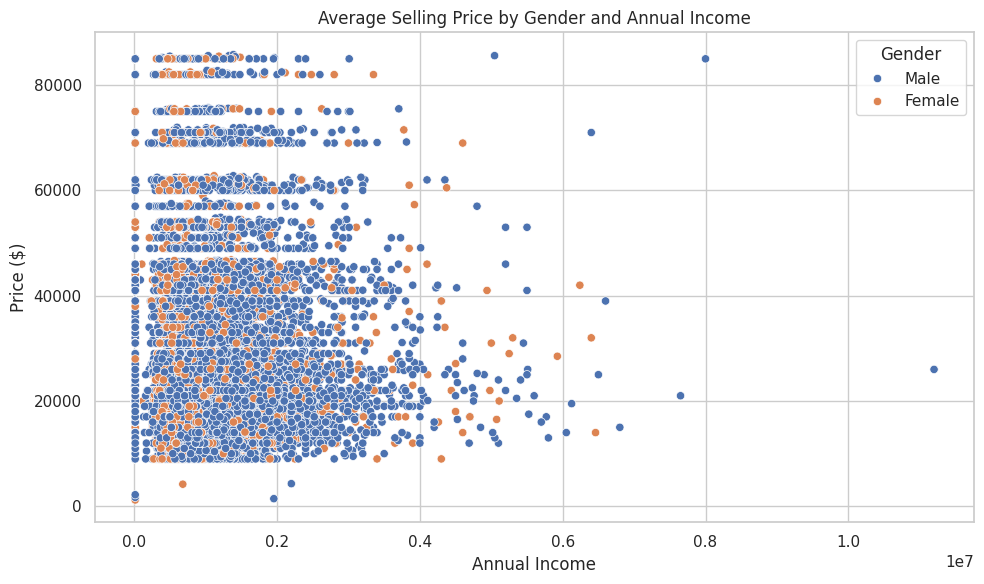

In [88]:
#Q6: How does the average selling price of cars vary by customer gender and annual income?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual Income", y="Price ($)", hue="Gender")
plt.title("Average Selling Price by Gender and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


<ipython-input-89-6cfffd608699>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="Set2")


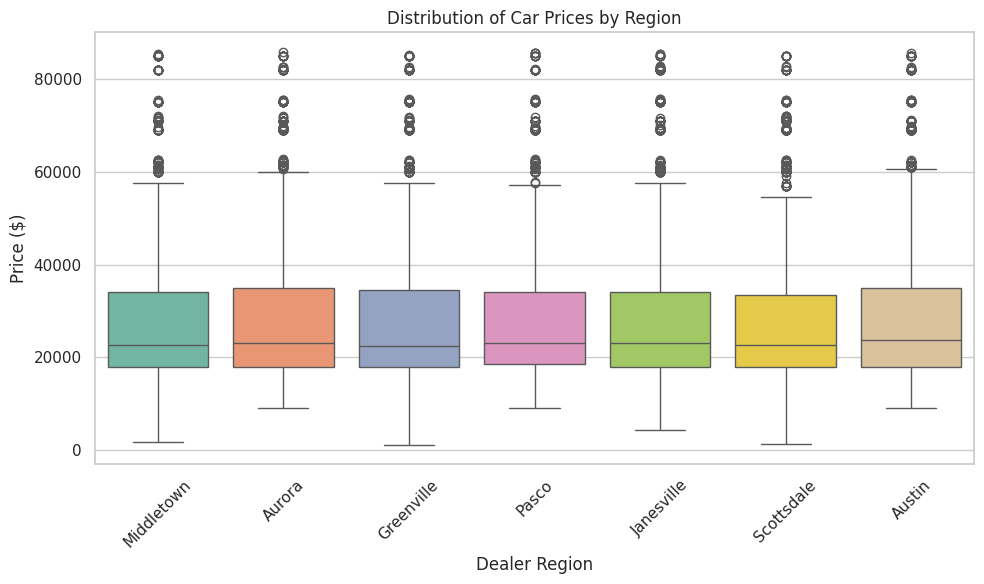

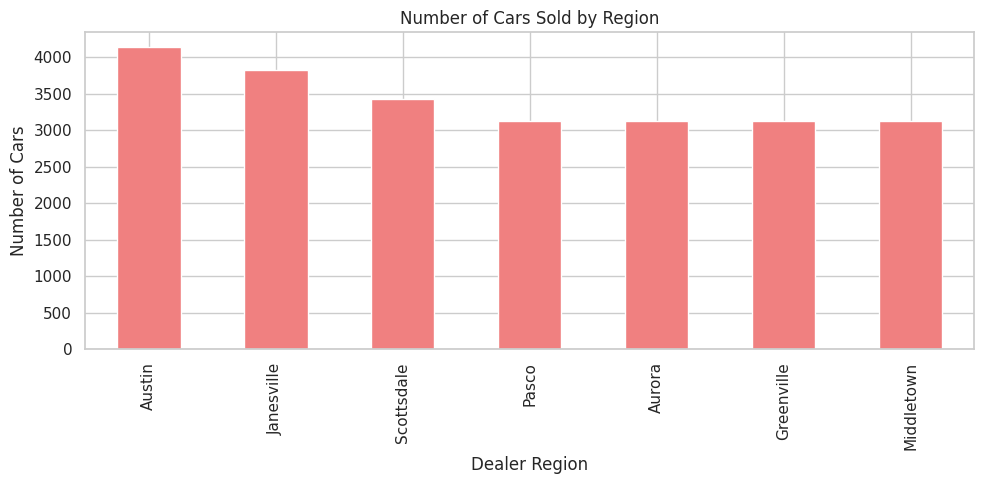

In [89]:
#Q7:What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Region")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df["Dealer_Region"].value_counts().plot(kind="bar", color="lightcoral")
plt.title("Number of Cars Sold by Region")
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()


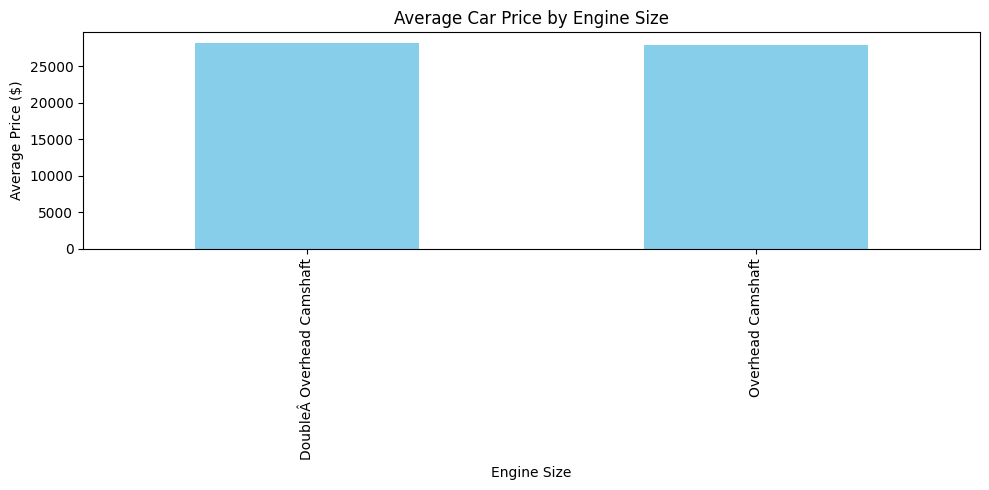

In [ ]:
#Q8:How does the average car price differ between cars with different engine sizes?
engine_avg_price = df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)

engine_avg_price.plot(kind="bar", figsize=(10, 5), color="skyblue")
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


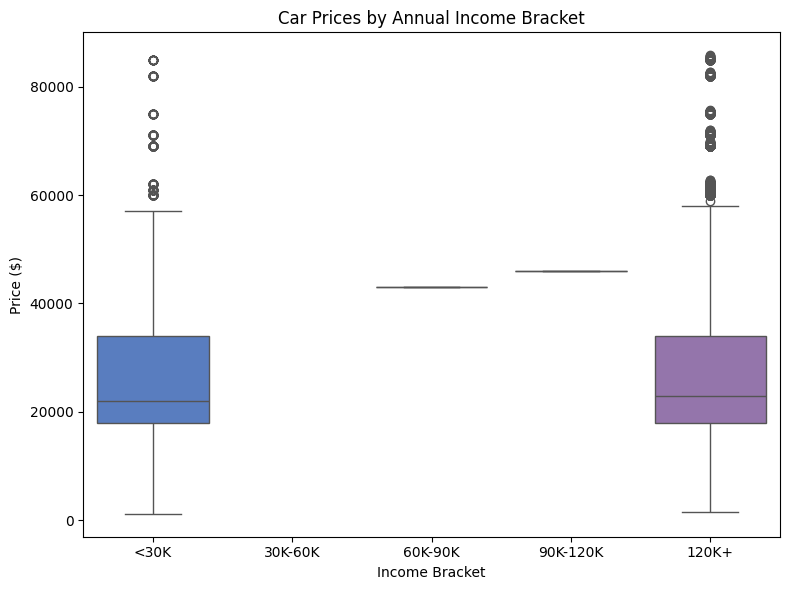

In [ ]:
#Q9:How do car prices vary based on the customer’s annual income bracket?
bins = [0, 30000, 60000, 90000, 120000, df["Annual Income"].max()]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K+']
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Income Bracket", y="Price ($)", palette="muted")
plt.title("Car Prices by Annual Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


<ipython-input-90-fbfb6e274d6c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_model_df, x="Model", y="Price ($)", palette="pastel")


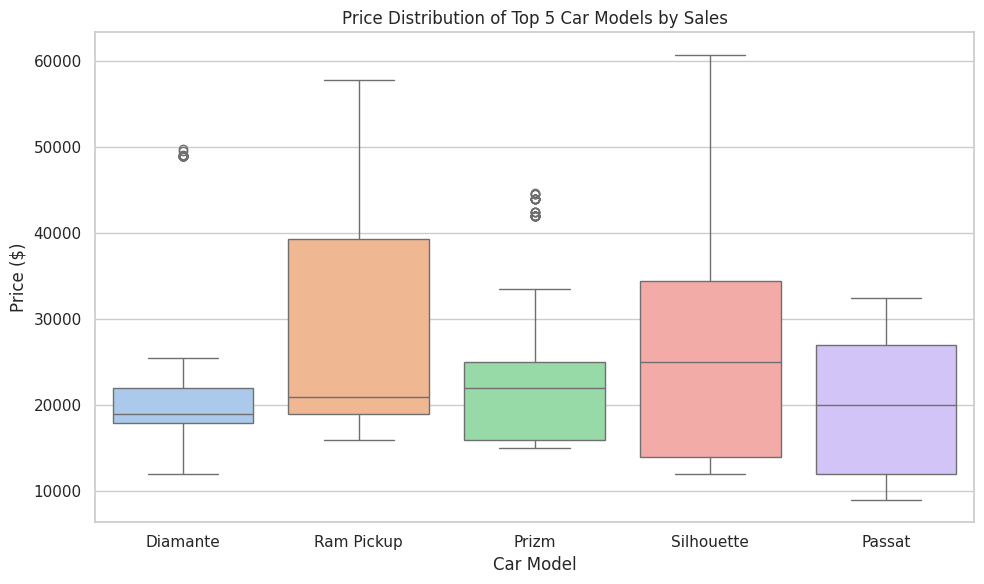

In [90]:
#Q10:What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df["Model"].value_counts().head(5).index

top_model_df = df[df["Model"].isin(top_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_model_df, x="Model", y="Price ($)", palette="pastel")
plt.title("Price Distribution of Top 5 Car Models by Sales")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


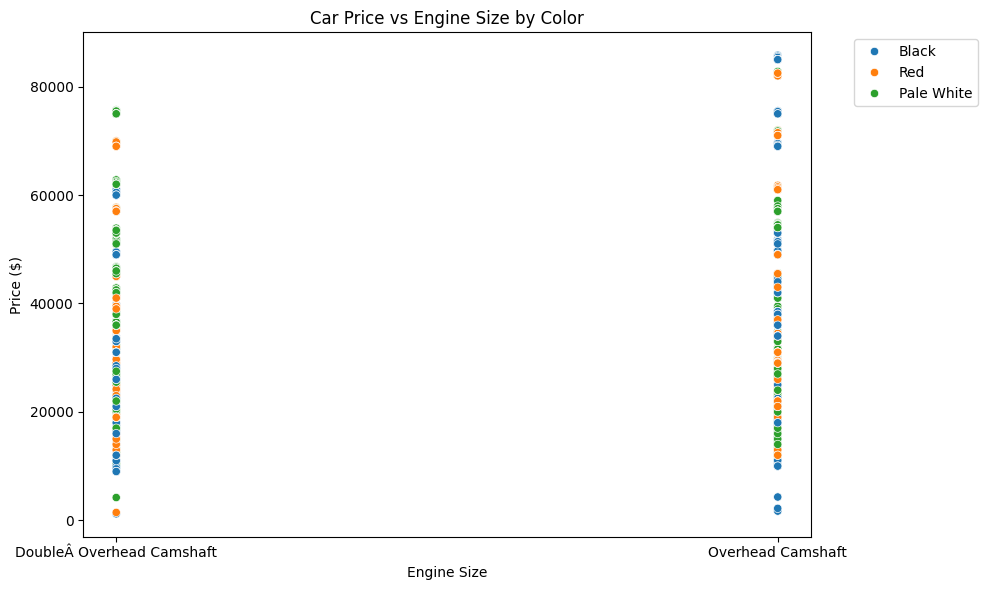

Price variation (standard deviation) by color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
#Q11:How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Engine", y="Price ($)", hue="Color", palette="tab10")
plt.title("Car Price vs Engine Size by Color")
plt.xlabel("Engine Size")
plt.ylabel("Price ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

price_variation_by_color = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print("Price variation (standard deviation) by color:\n", price_variation_by_color.head(5))


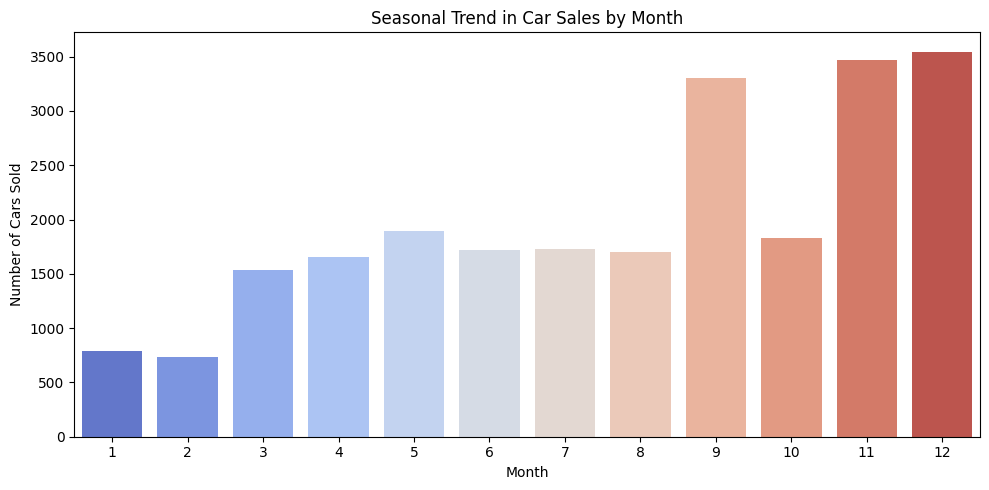

In [ ]:
#Q12:Is there any seasonal trend in car sales based on the date of sale?
df["Date"] = pd.to_datetime(df["Date"])

df["Month"] = df["Date"].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Month", palette="coolwarm")
plt.title("Seasonal Trend in Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.tight_layout()
plt.show()


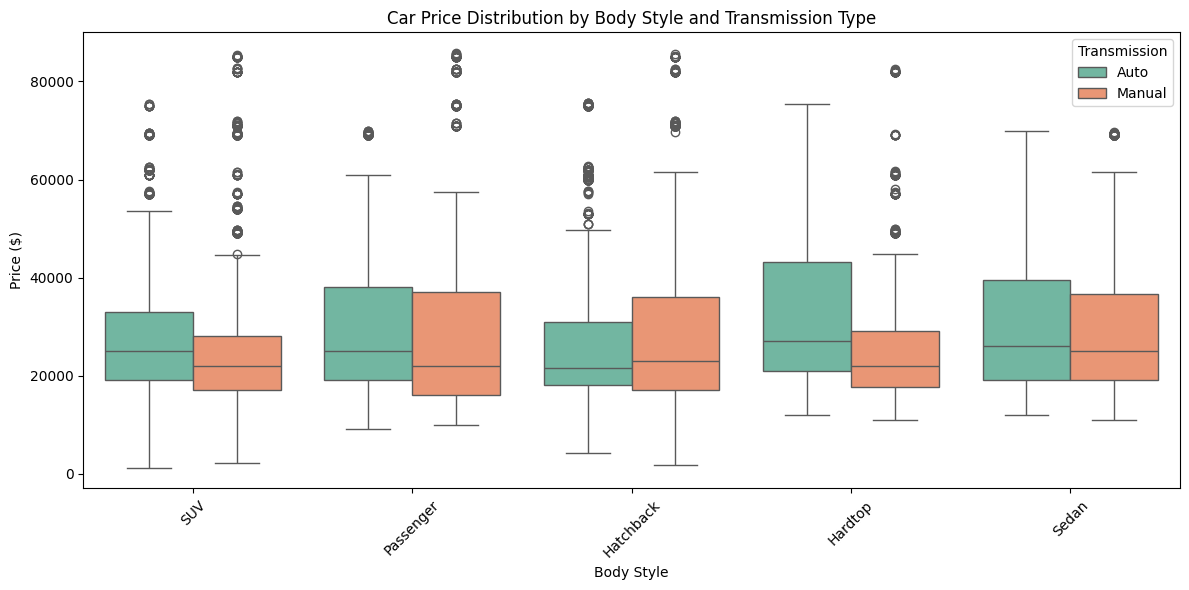

In [ ]:
#Q13: How does the car price distribution change when considering different combinations of body style and transmission type.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission", palette="Set2")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


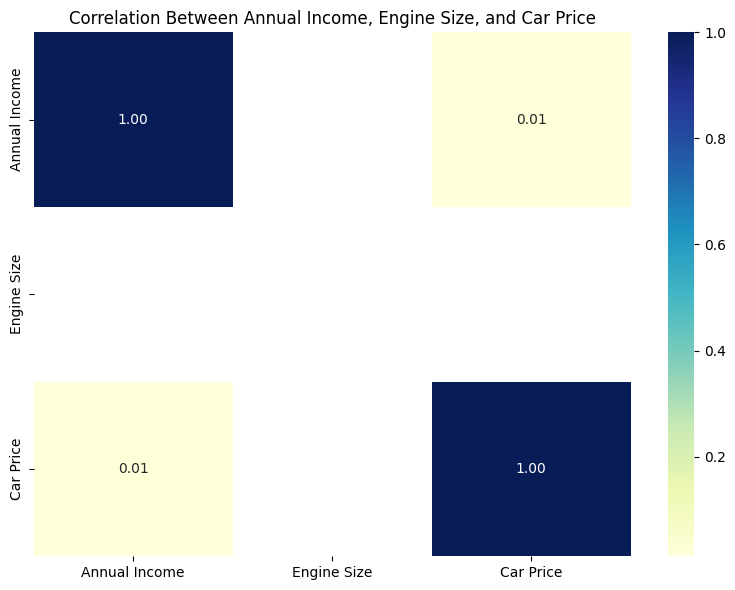

               Annual Income  Engine Size  Car Price
Annual Income       1.000000          NaN   0.012065
Engine Size              NaN          NaN        NaN
Car Price           0.012065          NaN   1.000000


In [9]:
#Q14:What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df = pd.read_csv("Car Sale.csv")

df_small = df[['Annual Income', 'Price ($)', 'Engine']].copy()

df_small.rename(columns={'Price ($)': 'Car Price'}, inplace=True)

def get_engine_size(text):
    if pd.isna(text):
        return None
    text = text.lower()
    if "double overhead" in text or "doubleÂ overhead" in text:
        return 3
    elif "overhead" in text:
        return 2
    elif "single" in text:
        return 1
    else:
        return None

df_small['Engine Size'] = df_small['Engine'].apply(get_engine_size)

df_small.dropna(inplace=True)

correlation = df_small[['Annual Income', 'Engine Size', 'Car Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Between Annual Income, Engine Size, and Car Price")
plt.tight_layout()
plt.show()

print(correlation)


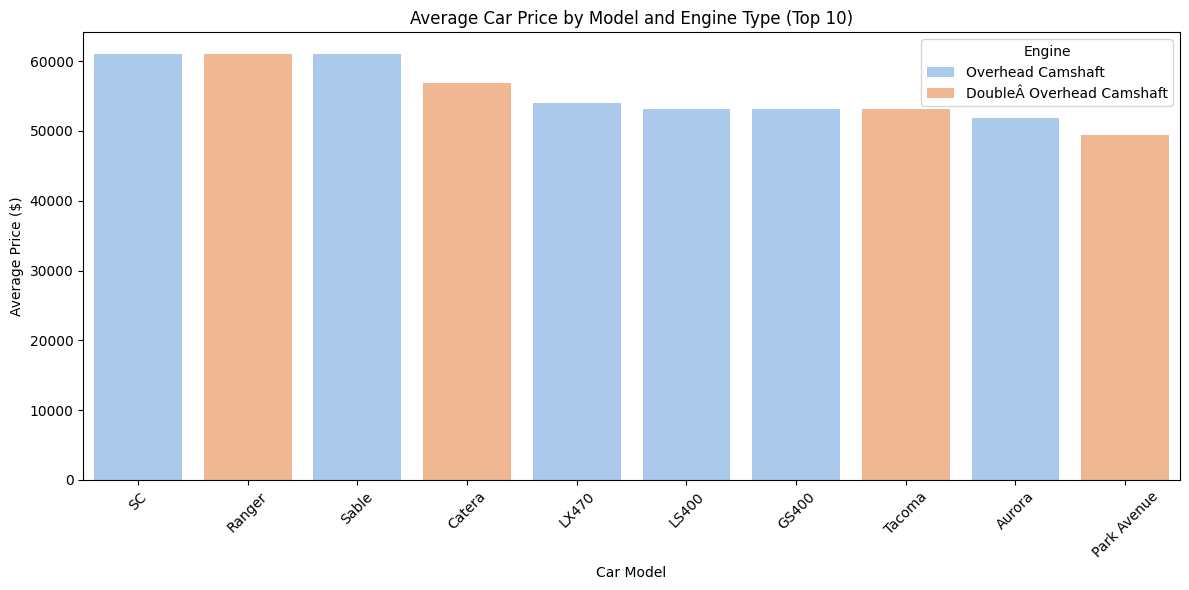

In [ ]:
#Q15: How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

top_avg_prices = avg_price_model_engine.sort_values(by="Price ($)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg_prices, x="Model", y="Price ($)", hue="Engine", palette="pastel")
plt.title("Average Car Price by Model and Engine Type (Top 10)")
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA-3

In [14]:
df2 = pd.read_csv('amazon.csv')
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [20]:
#Q1:What is the average rating for each product category?
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

df2_clean = df2.dropna(subset=['rating'])

average_ratings = df2_clean.groupby('category')['rating'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='rating', ascending=False)
print(average_ratings)



                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [21]:
#Q2: What are the top rating_count products by category?
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')

df2 = df2.dropna(subset=['rating_count'])

top_products = df2.sort_values(['category', 'rating_count'], ascending=[True, False])

top_products_by_category = top_products.groupby('category').first().reset_index()

print(top_products_by_category[['category', 'product_name', 'rating_count']])


                                             category  \
0   Computers&Accessories|Accessories&Peripherals|...   
1   Computers&Accessories|Accessories&Peripherals|...   
2   Computers&Accessories|Accessories&Peripherals|...   
3   Computers&Accessories|Accessories&Peripherals|...   
4   Computers&Accessories|Accessories&Peripherals|...   
..                                                ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                         product_name  rating_count  
0   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
1   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
2   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
3   STRIFF Mpad Mouse Mat 230X190X3

<ipython-input-98-8064a94a3d65>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['discounted_price'], label='Discounted Price', shade=True, color='green')
<ipython-input-98-8064a94a3d65>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['actual_price'], label='Actual Price', shade=True, color='red')
<ipython-input-98-8064a94a3d65>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


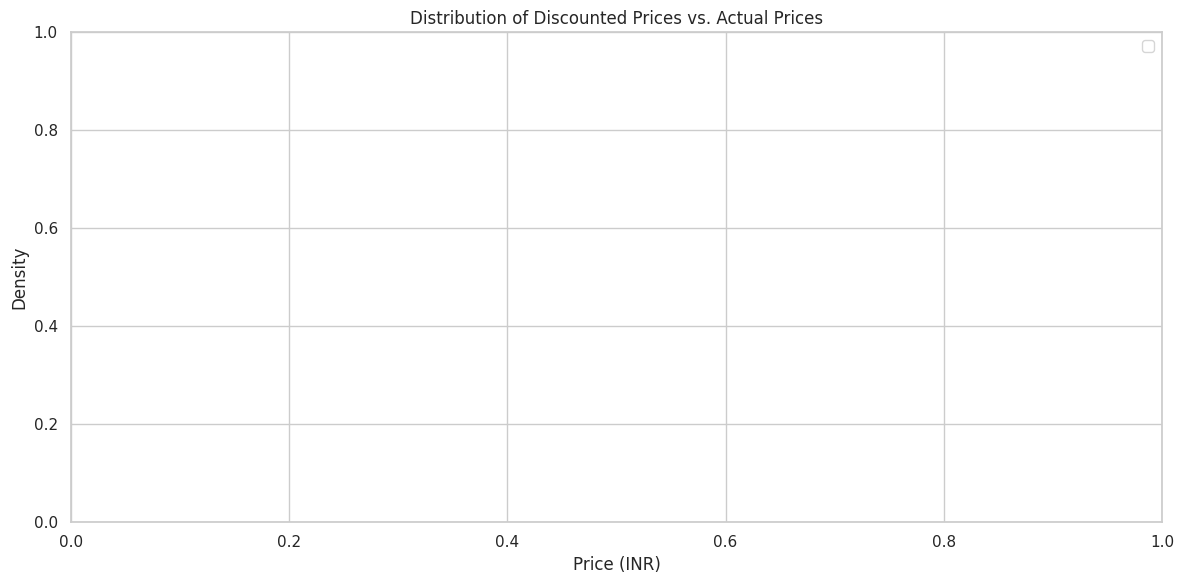

In [98]:
#Q3:What is the distribution of discounted prices vs. actual prices?
df2 = df2.dropna(subset=['discounted_price', 'actual_price'])

df2['discounted_price'] = pd.to_numeric(df2['discounted_price'].replace('[₹,]', '', regex=True))
df2['actual_price'] = pd.to_numeric(df2['actual_price'].replace('[₹,]', '', regex=True))

plt.figure(figsize=(12, 6))
sns.kdeplot(df2['discounted_price'], label='Discounted Price', shade=True, color='green')
sns.kdeplot(df2['actual_price'], label='Actual Price', shade=True, color='red')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()




In [99]:
#Q4:How does the average discount percentage vary across categories?
df = pd.read_csv('amazon.csv')

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df = df.dropna(subset=['discounted_price', 'actual_price'])

df['discount_pct'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

avg_discount_by_category = df.groupby('category')['discount_pct'].mean().sort_values(ascending=False)

print("Average Discount Percentage by Category:")
print(avg_discount_by_category)


Average Discount Percentage by Category:
Series([], Name: discount_pct, dtype: float64)


In [30]:
#Q5:What are the most popular product names?
popular_product_names = df['product_name'].value_counts().head(10)

print("Most Popular Product Names:")
print(popular_product_names)


Most Popular Product Names:
Series([], Name: count, dtype: int64)


In [33]:
#Q6:What are the most popular product keywords?
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv('amazon.csv')

text_data = df['product_name'].fillna('') + ' ' + df['about_product'].fillna('')

all_words = re.findall(r'\b[a-z]{3,}\b', ' '.join(text_data).lower())

filtered_words = [word for word in all_words if word not in stop_words]

keyword_counts = Counter(filtered_words)
most_common_keywords = keyword_counts.most_common(10)

print("Most Popular Product-Related Keywords (without stopwords):")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most Popular Product-Related Keywords (without stopwords):
usb: 1647
cable: 1333
charging: 909
type: 876
warranty: 814
high: 671
power: 654
devices: 639
fast: 636
easy: 636


In [34]:
#Q7:What are the most popular product reviews?
popular_reviews = df['review_content'].dropna().value_counts().head(10)

print("Most Popular Product Reviews:")
print(popular_reviews)


Most Popular Product Reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phon

In [35]:
#Q8:What is the correlation between discounted_price and rating?
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_corr = df.dropna(subset=['discounted_price', 'rating'])

correlation = df_corr['discounted_price'].corr(df_corr['rating'])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")


Correlation between Discounted Price and Rating: nan


In [116]:
#Q9:' What are the Top 5 categories based on the highest rating?
import pandas as pd
df2 = pd.read_csv('amazon.csv')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2 = df2.dropna(subset=['rating', 'category'])
df2['main_category'] = df2['category'].str.split('|').str[0]
category_ratings = df2.groupby('main_category')['rating'].mean()
top_5_categories = category_ratings.sort_values(ascending=False).head(5)

print("Top 5 Categories Based on Highest Average Rating:\n")
print(top_5_categories)



Top 5 Categories Based on Highest Average Rating:

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


In [101]:
#Q10:Identify any potential areas for improvement or optimization based on the data analysis.
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['discounted_price', 'actual_price', 'rating'])

df['discount_pct'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

category_stats = df.groupby('category')[['rating', 'discount_pct']].mean()

optimization_opps = category_stats[
    (category_stats['rating'] < 3.0) &
    (category_stats['discount_pct'] > 30)
].sort_values(by='rating')

print("Potential Areas for Improvement (Low Rating & High Discount):")
print(optimization_opps)


Potential Areas for Improvement (Low Rating & High Discount):
Empty DataFrame
Columns: [rating, discount_pct]
Index: []


EDA-4

In [39]:
df3 = pd.read_csv('spotify.csv')
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [45]:
#Q1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
null_counts = df3.isnull().sum()
print("Null Value Counts:\n", null_counts)


Null Value Counts:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


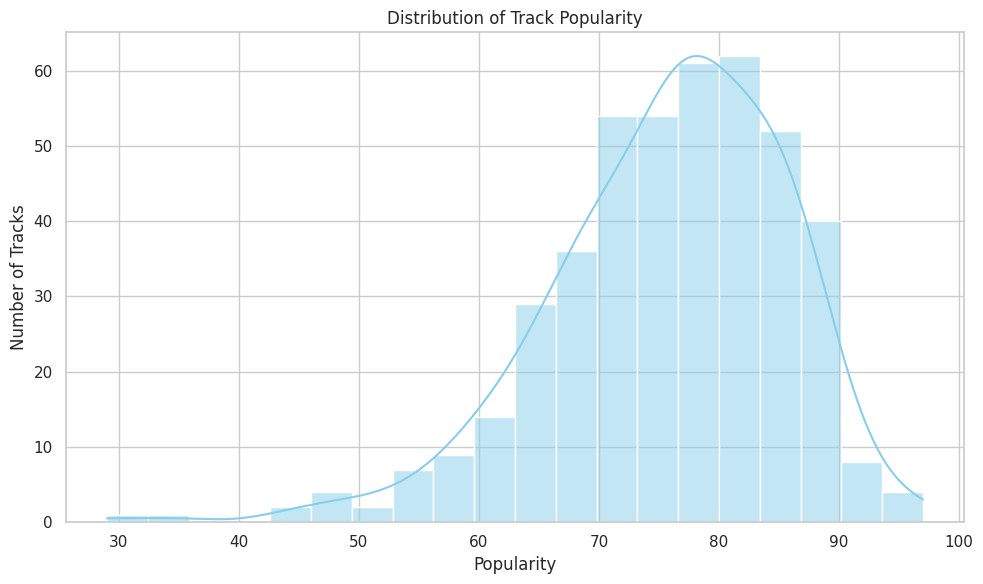

In [48]:
#Q2:What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


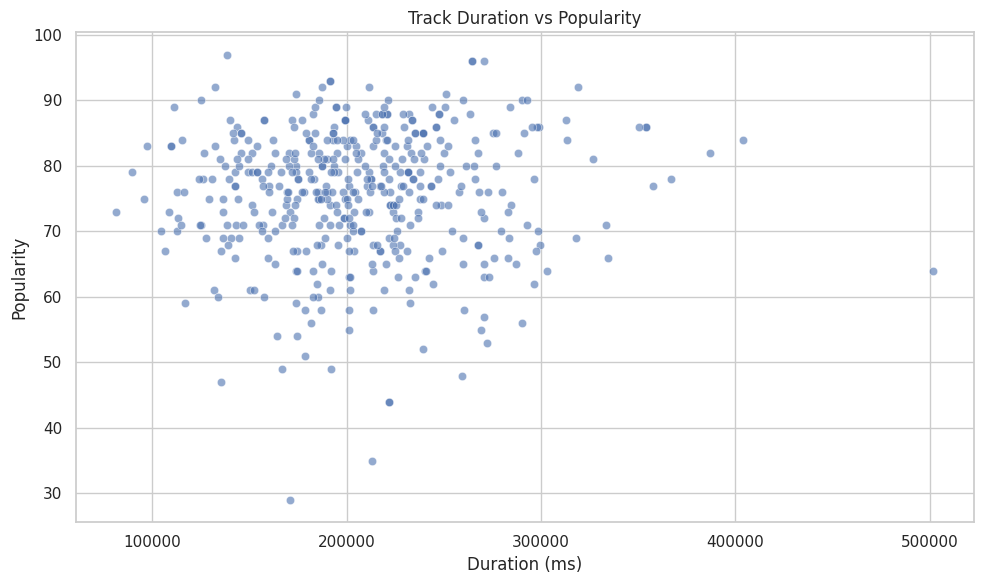

In [50]:
#Q3:Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Track Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()


<ipython-input-51-2a4eb94d0b97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3[df3['Artist'].isin(top_artists)],


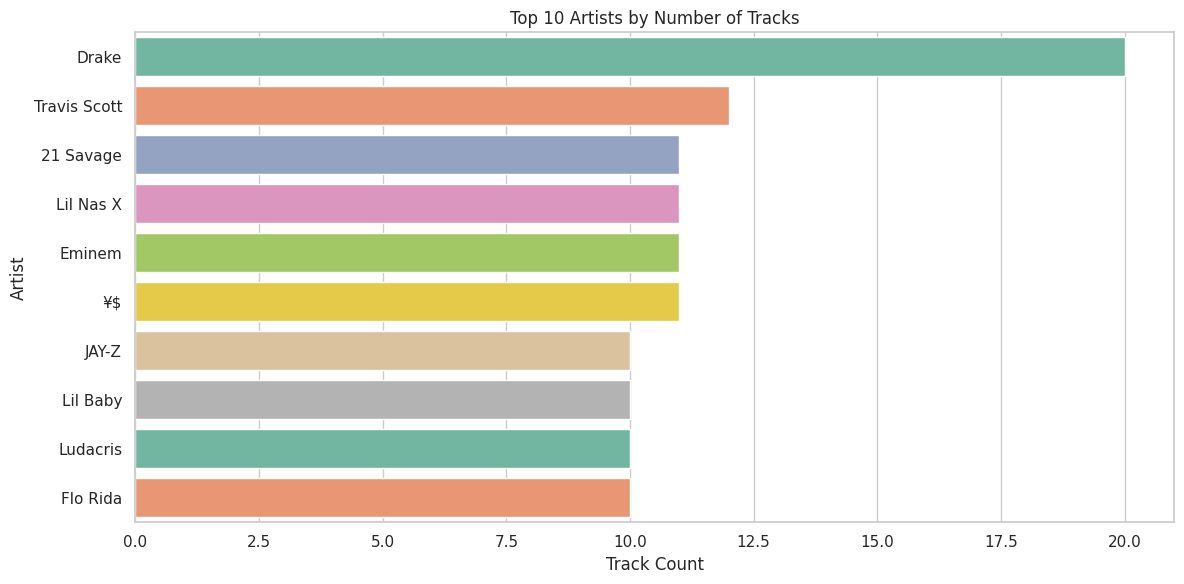

In [51]:
#Q4:Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
plt.figure(figsize=(12, 6))
top_artists = df3['Artist'].value_counts().nlargest(10).index
sns.countplot(data=df3[df3['Artist'].isin(top_artists)],
              y='Artist', order=top_artists, palette='Set2')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


In [53]:
#Q5:What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df3.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [54]:
#Q6:Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists_by_avg_pop = (
    df3.groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Artists by Average Popularity:\n", top_artists_by_avg_pop)


Top 5 Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [55]:
#Q7:For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_artist_tracks = {}
for artist in top_artists_by_avg_pop.index:
    top_track = df3[df3['Artist'] == artist].sort_values(by='Popularity', ascending=False).iloc[0]
    top_artist_tracks[artist] = top_track['Track Name']

print("Most Popular Tracks by Top 5 Artists:")
for artist, track in top_artist_tracks.items():
    print(f"{artist}: {track}")


Most Popular Tracks by Top 5 Artists:
cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


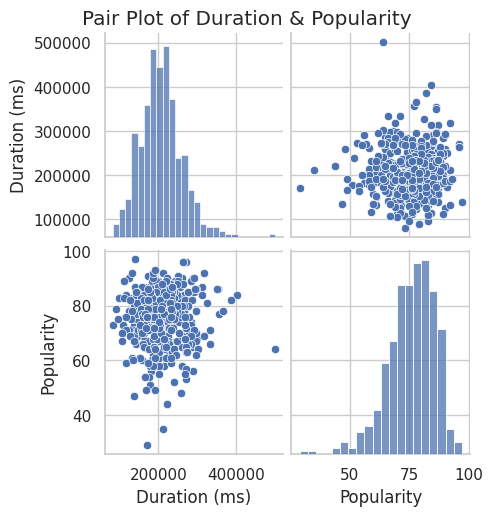

In [56]:
#Q8:Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df3[['Duration (ms)', 'Popularity']])
plt.suptitle('Pair Plot of Duration & Popularity', y=1.02)
plt.show()


<ipython-input-57-e440ebd5e741>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3[df3['Artist'].isin(top_artists_by_avg_pop.index)],


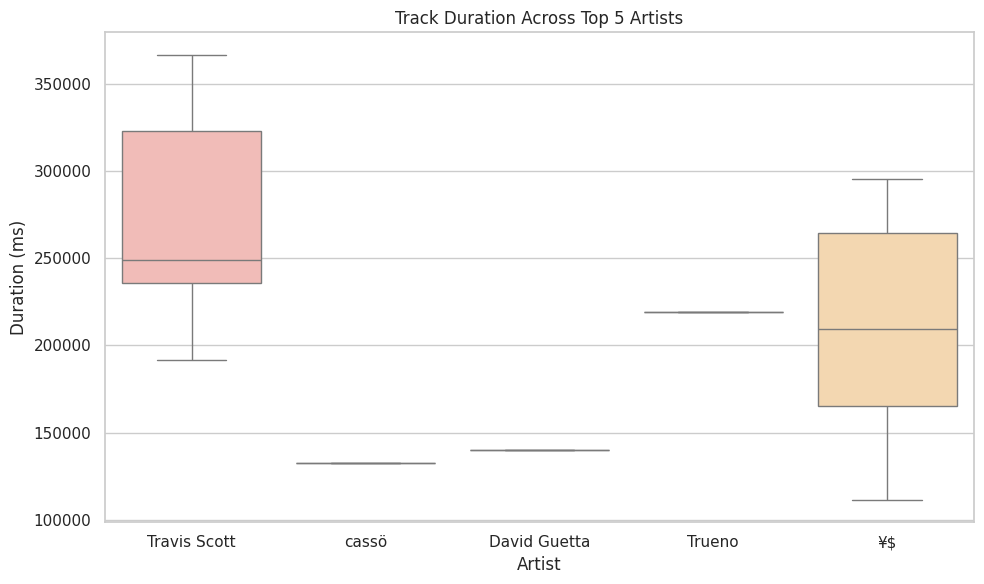

In [57]:
#Q9:Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[df3['Artist'].isin(top_artists_by_avg_pop.index)],
            x='Artist', y='Duration (ms)', palette='Pastel1')
plt.title('Track Duration Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()


<ipython-input-58-a7549231ce3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df3[df3['Artist'].isin(top_artists_by_avg_pop.index)],


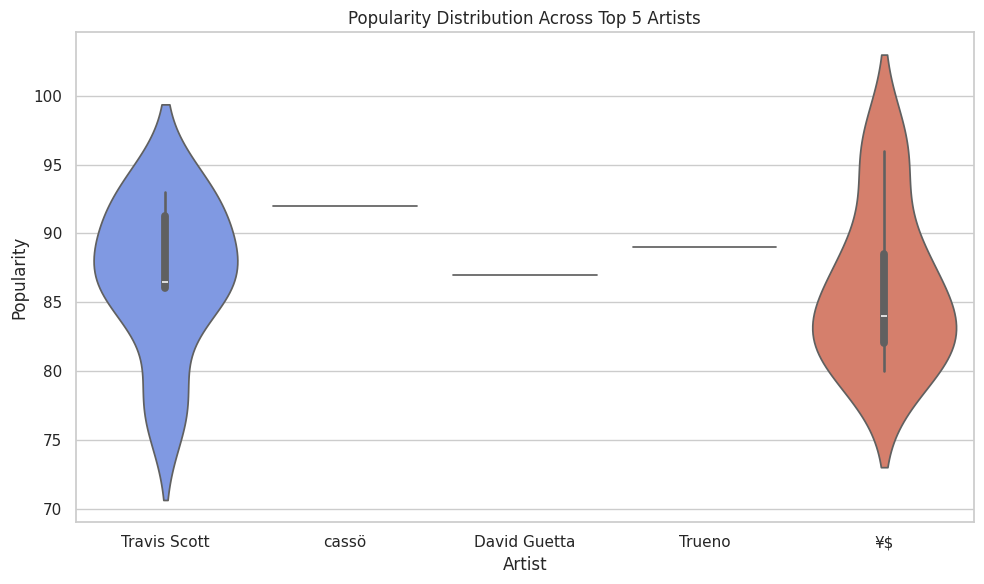

In [58]:
#Q10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df3[df3['Artist'].isin(top_artists_by_avg_pop.index)],
               x='Artist', y='Popularity', palette='coolwarm')
plt.title('Popularity Distribution Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

